In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pyspark.sql.types as T

In [2]:
spark = SparkSession.builder.appName('DataFrame').getOrCreate()

# pyspark shell

In [3]:
spark

In [4]:
#another type
sc

<SparkContext master=local[*] appName=PySparkShell>

#  Reading and Loading Dataset

In [5]:
df_pyspark = spark.read.csv('file:///home/mansoor11211802/Desktop/NSE_BANKING_SECTOR.csv',header=True,inferSchema=True)

In [6]:
df_pyspark.show()

+----------+------+------+----------+-------+-------+-------+-------+-------+-------+-------+--------------------+------+------------------+------------------+
|      DATE|SYMBOL|SERIES|PREV CLOSE|   OPEN|   HIGH|    LOW|   LAST|  CLOSE|   VWAP| VOLUME|            TURNOVER|TRADES|DELIVERABLE VOLUME|       %DELIVERBLE|
+----------+------+------+----------+-------+-------+-------+-------+-------+-------+-------+--------------------+------+------------------+------------------+
|2016-01-01|  HDFC|    EQ|   1263.75| 1261.0| 1266.9|1250.65| 1257.8|1258.45|1258.39| 676161|     8.5087506875E13| 13230|            308262|            0.4559|
|2016-01-04|  HDFC|    EQ|   1258.45| 1250.0| 1253.9|1212.05|1217.15| 1216.7|1227.55|1995329|2.449370563550000...| 78529|           1360507|0.6818000000000001|
|2016-01-05|  HDFC|    EQ|    1216.7| 1229.9|1233.45| 1206.5|1208.15| 1209.4| 1219.5|2325929|    2.83646403125E14|109820|           1644980|            0.7072|
|2016-01-06|  HDFC|    EQ|    1209.4| 12

In [7]:
df_pyspark.count()

41231

# Taking sample data of each columns to understand dataset

In [8]:
df_pyspark.take(1)

[Row(DATE='2016-01-01', SYMBOL='HDFC', SERIES='EQ', PREV CLOSE=1263.75, OPEN=1261.0, HIGH=1266.9, LOW=1250.65, LAST=1257.8, CLOSE=1258.45, VWAP=1258.39, VOLUME=676161, TURNOVER=85087506875000.0, TRADES=13230, DELIVERABLE VOLUME=308262, %DELIVERBLE=0.4559)]

In [9]:
# TO SHOW ALL COLUMNS
df_pyspark.columns

['DATE',
 'SYMBOL',
 'SERIES',
 'PREV CLOSE',
 'OPEN',
 'HIGH',
 'LOW',
 'LAST',
 'CLOSE',
 'VWAP',
 'VOLUME',
 'TURNOVER',
 'TRADES',
 'DELIVERABLE VOLUME',
 '%DELIVERBLE']

In [10]:
df_pyspark.select("SYMBOL").distinct().show()

+----------+
|    SYMBOL|
+----------+
| ICICIBANK|
|    AUBANK|
|       CUB|
|   KTKBANK|
|   CSBBANK|
| CENTRALBK|
|       PSB|
|   UCOBANK|
|      IDBI|
|       PNB|
| BANKINDIA|
|      HDFC|
|   J&KBANK|
|       IOB|
|   DCBBANK|
|  SURYODAY|
|  MAHABANK|
|EQUITASBNK|
|  IDFCBANK|
|   RBLBANK|
+----------+
only showing top 20 rows



# check the schema

In [11]:
##check the schema.
df_pyspark.printSchema()

root
 |-- DATE: string (nullable = true)
 |-- SYMBOL: string (nullable = true)
 |-- SERIES: string (nullable = true)
 |-- PREV CLOSE: double (nullable = true)
 |-- OPEN: double (nullable = true)
 |-- HIGH: double (nullable = true)
 |-- LOW: double (nullable = true)
 |-- LAST: double (nullable = true)
 |-- CLOSE: double (nullable = true)
 |-- VWAP: double (nullable = true)
 |-- VOLUME: integer (nullable = true)
 |-- TURNOVER: double (nullable = true)
 |-- TRADES: integer (nullable = true)
 |-- DELIVERABLE VOLUME: integer (nullable = true)
 |-- %DELIVERBLE: double (nullable = true)



#  Droping Duplicates

In [14]:
df = df_pyspark.dropDuplicates()

In [15]:
df_pyspark.groupBy(df_pyspark.columns)\
.count()\
.where(F.col('count')>1)\
.select(F.sum('count'))\
.show()

+----------+
|sum(count)|
+----------+
|      null|
+----------+



In [16]:
df_pyspark.count()

41231

# To know Single column

In [17]:
##TO KNOW TRADES COLUMN
df_pyspark.select('TRADES').show()

+------+
|TRADES|
+------+
| 13230|
| 78529|
|109820|
| 96546|
| 60151|
| 79183|
| 90184|
| 60394|
| 67493|
| 88329|
| 54238|
| 48680|
| 68378|
| 82183|
| 98807|
| 90734|
|105103|
| 63831|
|145360|
|124408|
+------+
only showing top 20 rows



In [18]:
## TO TAKE MULTIPLE COLUNMNS
df_pyspark.select(['TRADES','SYMBOL']).show()

+------+------+
|TRADES|SYMBOL|
+------+------+
| 13230|  HDFC|
| 78529|  HDFC|
|109820|  HDFC|
| 96546|  HDFC|
| 60151|  HDFC|
| 79183|  HDFC|
| 90184|  HDFC|
| 60394|  HDFC|
| 67493|  HDFC|
| 88329|  HDFC|
| 54238|  HDFC|
| 48680|  HDFC|
| 68378|  HDFC|
| 82183|  HDFC|
| 98807|  HDFC|
| 90734|  HDFC|
|105103|  HDFC|
| 63831|  HDFC|
|145360|  HDFC|
|124408|  HDFC|
+------+------+
only showing top 20 rows



In [19]:
df_pyspark.dtypes

[('DATE', 'string'),
 ('SYMBOL', 'string'),
 ('SERIES', 'string'),
 ('PREV CLOSE', 'double'),
 ('OPEN', 'double'),
 ('HIGH', 'double'),
 ('LOW', 'double'),
 ('LAST', 'double'),
 ('CLOSE', 'double'),
 ('VWAP', 'double'),
 ('VOLUME', 'int'),
 ('TURNOVER', 'double'),
 ('TRADES', 'int'),
 ('DELIVERABLE VOLUME', 'int'),
 ('%DELIVERBLE', 'double')]

# LOAD DATA WITH RDD

In [20]:
from pyspark import SparkContext, SparkConf
rdd1 = sc.textFile('file:///home/mansoor11211802/Desktop/NSE_BANKING_SECTOR.csv')
rdd1.take(10)

['DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE',
 '2016-01-01,HDFC,EQ,1263.75,1261.0,1266.9,1250.65,1257.8,1258.45,1258.39,676161,85087506875000.0,13230,308262,0.4559',
 '2016-01-04,HDFC,EQ,1258.45,1250.0,1253.9,1212.05,1217.15,1216.7,1227.55,1995329,244937056355000.03,78529,1360507,0.6818000000000001',
 '2016-01-05,HDFC,EQ,1216.7,1229.9,1233.45,1206.5,1208.15,1209.4,1219.5,2325929,283646403125000.0,109820,1644980,0.7072',
 '2016-01-06,HDFC,EQ,1209.4,1209.6,1220.75,1202.4,1207.55,1209.3,1210.81,2746330,332528632100000.0,96546,2001431,0.7288',
 '2016-01-07,HDFC,EQ,1209.3,1198.85,1203.55,1175.0,1176.35,1179.45,1186.35,1780298,211205540675000.0,60151,1172564,0.6586',
 '2016-01-08,HDFC,EQ,1179.45,1189.85,1230.0,1169.0,1176.45,1174.4,1175.62,2467149,290042344730000.0,79183,1703449,0.6905',
 '2016-01-11,HDFC,EQ,1174.4,1165.0,1171.0,1150.1,1162.35,1161.55,1158.32,2288312,265059728000000.0,90184,1541783,0.6738',
 '2016-01-12,

# Filter Function

In [21]:
rdd_head= rdd1.first()
rdd2 = rdd1.filter(lambda line:line!=rdd_head)

In [22]:
rdd2.first()

'2016-01-01,HDFC,EQ,1263.75,1261.0,1266.9,1250.65,1257.8,1258.45,1258.39,676161,85087506875000.0,13230,308262,0.4559'

# mapping

In [23]:
#map functions
rdd2.map(lambda line:line.split(',')).take(1)

[['2016-01-01',
  'HDFC',
  'EQ',
  '1263.75',
  '1261.0',
  '1266.9',
  '1250.65',
  '1257.8',
  '1258.45',
  '1258.39',
  '676161',
  '85087506875000.0',
  '13230',
  '308262',
  '0.4559']]

# SQL QUERIES

In [24]:
df_pyspark.registerTempTable('data_table')
sqlContext.sql('select * from data_table').show(5)

+----------+------+------+----------+-------+-------+-------+-------+-------+-------+-------+--------------------+------+------------------+------------------+
|      DATE|SYMBOL|SERIES|PREV CLOSE|   OPEN|   HIGH|    LOW|   LAST|  CLOSE|   VWAP| VOLUME|            TURNOVER|TRADES|DELIVERABLE VOLUME|       %DELIVERBLE|
+----------+------+------+----------+-------+-------+-------+-------+-------+-------+-------+--------------------+------+------------------+------------------+
|2016-01-01|  HDFC|    EQ|   1263.75| 1261.0| 1266.9|1250.65| 1257.8|1258.45|1258.39| 676161|     8.5087506875E13| 13230|            308262|            0.4559|
|2016-01-04|  HDFC|    EQ|   1258.45| 1250.0| 1253.9|1212.05|1217.15| 1216.7|1227.55|1995329|2.449370563550000...| 78529|           1360507|0.6818000000000001|
|2016-01-05|  HDFC|    EQ|    1216.7| 1229.9|1233.45| 1206.5|1208.15| 1209.4| 1219.5|2325929|    2.83646403125E14|109820|           1644980|            0.7072|
|2016-01-06|  HDFC|    EQ|    1209.4| 12

In [25]:
sqlContext.sql('select SYMBOL from data_table').show(1)

+------+
|SYMBOL|
+------+
|  HDFC|
+------+
only showing top 1 row



In [26]:
sqlContext.sql('select distinct(SYMBOL) from data_table').show()

+----------+
|    SYMBOL|
+----------+
| ICICIBANK|
|    AUBANK|
|       CUB|
|   KTKBANK|
|   CSBBANK|
| CENTRALBK|
|       PSB|
|   UCOBANK|
|      IDBI|
|       PNB|
| BANKINDIA|
|      HDFC|
|   J&KBANK|
|       IOB|
|   DCBBANK|
|  SURYODAY|
|  MAHABANK|
|EQUITASBNK|
|  IDFCBANK|
|   RBLBANK|
+----------+
only showing top 20 rows



In [27]:
sqlContext.sql('select max(LAST) from data_table').show()

+---------+
|max(LAST)|
+---------+
|  2861.55|
+---------+



In [28]:
sqlContext.sql('select min(LAST) from data_table').show()

+---------+
|min(LAST)|
+---------+
|      4.9|
+---------+



# Getting Averages

In [29]:
import pyspark.sql.functions as F
avg_rent = df_pyspark.groupby().agg(F.avg('VWAP')).cache()
avg_rent.show()

+-----------------+
|        avg(VWAP)|
+-----------------+
|292.1607307608334|
+-----------------+



# Describe Function

To know Count, Mean, Stddev , Min ,
Max


In [30]:
df_pyspark.describe().show()

+-------+----------+-------+------+-----------------+------------------+-----------------+------------------+-----------------+------------------+-----------------+-------------------+--------------------+------------------+------------------+-------------------+
|summary|      DATE| SYMBOL|SERIES|       PREV CLOSE|              OPEN|             HIGH|               LOW|             LAST|             CLOSE|             VWAP|             VOLUME|            TURNOVER|            TRADES|DELIVERABLE VOLUME|        %DELIVERBLE|
+-------+----------+-------+------+-----------------+------------------+-----------------+------------------+-----------------+------------------+-----------------+-------------------+--------------------+------------------+------------------+-------------------+
|  count|     41231|  41231| 41231|            41231|             41231|            41231|             41231|            41231|             41231|            41231|              41231|               41231|   

In [31]:
df_pyspark.describe('SYMBOL').show()

+-------+-------+
|summary| SYMBOL|
+-------+-------+
|  count|  41231|
|   mean|   null|
| stddev|   null|
|    min| AUBANK|
|    max|YESBANK|
+-------+-------+



In [32]:
df_pyspark.describe('TRADES').show()

+-------+------------------+
|summary|            TRADES|
+-------+------------------+
|  count|             41231|
|   mean|52218.115786665374|
| stddev| 88510.20733952372|
|    min|                94|
|    max|           1788274|
+-------+------------------+



In [33]:
df_pyspark.describe('OPEN').show()

+-------+------------------+
|summary|              OPEN|
+-------+------------------+
|  count|             41231|
|   mean|292.35094710290934|
| stddev| 452.9678921810755|
|    min|              4.95|
|    max|            2871.0|
+-------+------------------+



In [34]:
df_pyspark.describe('CLOSE').show()

+-------+------------------+
|summary|             CLOSE|
+-------+------------------+
|  count|             41231|
|   mean|292.01308845286445|
| stddev| 452.7320642128108|
|    min|               4.9|
|    max|           2860.45|
+-------+------------------+



In [35]:
df_pyspark.describe('HIGH').show()

+-------+-----------------+
|summary|             HIGH|
+-------+-----------------+
|  count|            41231|
|   mean|296.5184836652005|
| stddev|458.2247568688417|
|    min|             4.95|
|    max|           2896.0|
+-------+-----------------+



In [36]:
df_pyspark.describe('LOW').show()

+-------+------------------+
|summary|               LOW|
+-------+------------------+
|  count|             41231|
|   mean|287.72344837623086|
| stddev| 447.0694317661111|
|    min|               4.8|
|    max|            2838.0|
+-------+------------------+



In [37]:
df_pyspark.describe('VWAP').show()

+-------+-----------------+
|summary|             VWAP|
+-------+-----------------+
|  count|            41231|
|   mean|292.1607307608334|
| stddev|452.6553137088171|
|    min|             4.91|
|    max|          2867.92|
+-------+-----------------+



In [38]:
df_pyspark.describe('PREV CLOSE').show()

+-------+-----------------+
|summary|       PREV CLOSE|
+-------+-----------------+
|  count|            41231|
|   mean|291.9627525405654|
| stddev|452.5410277254348|
|    min|              4.9|
|    max|          2860.45|
+-------+-----------------+



In [39]:
df_pyspark.describe('LAST').show()

+-------+-----------------+
|summary|             LAST|
+-------+-----------------+
|  count|            41231|
|   mean|291.9936055395213|
| stddev|452.7173431704831|
|    min|              4.9|
|    max|          2861.55|
+-------+-----------------+



In [40]:
df_pyspark.describe('VOLUME').show()

+-------+-------------------+
|summary|             VOLUME|
+-------+-------------------+
|  count|              41231|
|   mean|1.042650207695666E7|
| stddev|2.953972120784208E7|
|    min|               9194|
|    max|         1264917719|
+-------+-------------------+



In [41]:
df_pyspark.describe('TURNOVER').show()

+-------+--------------------+
|summary|            TURNOVER|
+-------+--------------------+
|  count|               41231|
|   mean|1.953615145271054E14|
| stddev|4.038675009566605...|
|    min|1.681627999999999...|
|    max|  1.4982219064275E16|
+-------+--------------------+



In [42]:
df_pyspark.describe('DELIVERABLE VOLUME').show()

+-------+------------------+
|summary|DELIVERABLE VOLUME|
+-------+------------------+
|  count|             41231|
|   mean| 3026934.880963353|
| stddev| 9387528.100114819|
|    min|              7392|
|    max|         787086390|
+-------+------------------+



In [43]:
df_pyspark.describe('%DELIVERBLE').show()

+-------+-------------------+
|summary|        %DELIVERBLE|
+-------+-------------------+
|  count|              41231|
|   mean| 0.4154164681914107|
| stddev|0.19612223330677533|
|    min|             0.0201|
|    max|                1.0|
+-------+-------------------+



# Droping Columns

# Droped SERIES Column becase it has Unique values.

In [44]:
df_pyspark.select('SERIES').show()

+------+
|SERIES|
+------+
|    EQ|
|    EQ|
|    EQ|
|    EQ|
|    EQ|
|    EQ|
|    EQ|
|    EQ|
|    EQ|
|    EQ|
|    EQ|
|    EQ|
|    EQ|
|    EQ|
|    EQ|
|    EQ|
|    EQ|
|    EQ|
|    EQ|
|    EQ|
+------+
only showing top 20 rows



In [45]:
df_pyspark = df_pyspark.drop("SERIES").show()

+----------+------+----------+-------+-------+-------+-------+-------+-------+-------+--------------------+------+------------------+------------------+
|      DATE|SYMBOL|PREV CLOSE|   OPEN|   HIGH|    LOW|   LAST|  CLOSE|   VWAP| VOLUME|            TURNOVER|TRADES|DELIVERABLE VOLUME|       %DELIVERBLE|
+----------+------+----------+-------+-------+-------+-------+-------+-------+-------+--------------------+------+------------------+------------------+
|2016-01-01|  HDFC|   1263.75| 1261.0| 1266.9|1250.65| 1257.8|1258.45|1258.39| 676161|     8.5087506875E13| 13230|            308262|            0.4559|
|2016-01-04|  HDFC|   1258.45| 1250.0| 1253.9|1212.05|1217.15| 1216.7|1227.55|1995329|2.449370563550000...| 78529|           1360507|0.6818000000000001|
|2016-01-05|  HDFC|    1216.7| 1229.9|1233.45| 1206.5|1208.15| 1209.4| 1219.5|2325929|    2.83646403125E14|109820|           1644980|            0.7072|
|2016-01-06|  HDFC|    1209.4| 1209.6|1220.75| 1202.4|1207.55| 1209.3|1210.81|2746

# DROPPING NULL VALUES

In [46]:
##DROPING NULL VALUES
df.na.drop()

DataFrame[DATE: string, SYMBOL: string, SERIES: string, PREV CLOSE: double, OPEN: double, HIGH: double, LOW: double, LAST: double, CLOSE: double, VWAP: double, VOLUME: int, TURNOVER: double, TRADES: int, DELIVERABLE VOLUME: int, %DELIVERBLE: double]

In [47]:
##dropping any===how
df.na.drop(how='any').show()

+----------+---------+------+----------+-------+-------+-------+-------+-------+-------+--------+--------------------+------+------------------+-------------------+
|      DATE|   SYMBOL|SERIES|PREV CLOSE|   OPEN|   HIGH|    LOW|   LAST|  CLOSE|   VWAP|  VOLUME|            TURNOVER|TRADES|DELIVERABLE VOLUME|        %DELIVERBLE|
+----------+---------+------+----------+-------+-------+-------+-------+-------+-------+--------+--------------------+------+------------------+-------------------+
|2016-06-01|     HDFC|    EQ|    1237.7|1242.15|1248.35| 1230.0|1242.65|1243.25|1240.56| 2279936|    2.82838755045E14| 70333|           1546879|             0.6785|
|2016-10-04|     HDFC|    EQ|    1425.5|1423.25| 1435.2| 1416.1| 1432.0| 1432.4|1426.49| 2188072|    3.12126666315E14| 56442|           1689229|              0.772|
|2016-11-03|     HDFC|    EQ|   1404.35| 1400.9|1411.45| 1395.7| 1404.9| 1401.6|1403.23| 1447474|     2.0311334086E14| 62943|           1115685|             0.7708|
|2017-01-2

# By using threshold we can handle dropping condition.

In [48]:
##threshold 
df.na.drop(how="any", thresh=3).show(5)

+----------+------+------+----------+-------+-------+-------+-------+-------+-------+-------+-----------------+------+------------------+-----------+
|      DATE|SYMBOL|SERIES|PREV CLOSE|   OPEN|   HIGH|    LOW|   LAST|  CLOSE|   VWAP| VOLUME|         TURNOVER|TRADES|DELIVERABLE VOLUME|%DELIVERBLE|
+----------+------+------+----------+-------+-------+-------+-------+-------+-------+-------+-----------------+------+------------------+-----------+
|2016-06-01|  HDFC|    EQ|    1237.7|1242.15|1248.35| 1230.0|1242.65|1243.25|1240.56|2279936| 2.82838755045E14| 70333|           1546879|     0.6785|
|2016-10-04|  HDFC|    EQ|    1425.5|1423.25| 1435.2| 1416.1| 1432.0| 1432.4|1426.49|2188072| 3.12126666315E14| 56442|           1689229|      0.772|
|2016-11-03|  HDFC|    EQ|   1404.35| 1400.9|1411.45| 1395.7| 1404.9| 1401.6|1403.23|1447474|  2.0311334086E14| 62943|           1115685|     0.7708|
|2017-01-24|  HDFC|    EQ|   1259.75| 1263.1| 1282.0| 1260.0| 1277.1|1280.75|1276.14|1937436| 2.4724

# droping using subset

In [49]:
##subset
df.na.drop(how="any", subset=['VOLUME']).show(5)

+----------+------+------+----------+-------+-------+-------+-------+-------+-------+-------+-----------------+------+------------------+-----------+
|      DATE|SYMBOL|SERIES|PREV CLOSE|   OPEN|   HIGH|    LOW|   LAST|  CLOSE|   VWAP| VOLUME|         TURNOVER|TRADES|DELIVERABLE VOLUME|%DELIVERBLE|
+----------+------+------+----------+-------+-------+-------+-------+-------+-------+-------+-----------------+------+------------------+-----------+
|2016-06-01|  HDFC|    EQ|    1237.7|1242.15|1248.35| 1230.0|1242.65|1243.25|1240.56|2279936| 2.82838755045E14| 70333|           1546879|     0.6785|
|2016-10-04|  HDFC|    EQ|    1425.5|1423.25| 1435.2| 1416.1| 1432.0| 1432.4|1426.49|2188072| 3.12126666315E14| 56442|           1689229|      0.772|
|2016-11-03|  HDFC|    EQ|   1404.35| 1400.9|1411.45| 1395.7| 1404.9| 1401.6|1403.23|1447474|  2.0311334086E14| 62943|           1115685|     0.7708|
|2017-01-24|  HDFC|    EQ|   1259.75| 1263.1| 1282.0| 1260.0| 1277.1|1280.75|1276.14|1937436| 2.4724

# FILLING MISSING VALUES

In [50]:
df.na.fill(value='missingvalues', subset=['SYMBOL','TRADES']).show(5)

+----------+------+------+----------+-------+-------+-------+-------+-------+-------+-------+-----------------+------+------------------+-----------+
|      DATE|SYMBOL|SERIES|PREV CLOSE|   OPEN|   HIGH|    LOW|   LAST|  CLOSE|   VWAP| VOLUME|         TURNOVER|TRADES|DELIVERABLE VOLUME|%DELIVERBLE|
+----------+------+------+----------+-------+-------+-------+-------+-------+-------+-------+-----------------+------+------------------+-----------+
|2016-06-01|  HDFC|    EQ|    1237.7|1242.15|1248.35| 1230.0|1242.65|1243.25|1240.56|2279936| 2.82838755045E14| 70333|           1546879|     0.6785|
|2016-10-04|  HDFC|    EQ|    1425.5|1423.25| 1435.2| 1416.1| 1432.0| 1432.4|1426.49|2188072| 3.12126666315E14| 56442|           1689229|      0.772|
|2016-11-03|  HDFC|    EQ|   1404.35| 1400.9|1411.45| 1395.7| 1404.9| 1401.6|1403.23|1447474|  2.0311334086E14| 62943|           1115685|     0.7708|
|2017-01-24|  HDFC|    EQ|   1259.75| 1263.1| 1282.0| 1260.0| 1277.1|1280.75|1276.14|1937436| 2.4724

In [51]:
### To fill the null function with MEAN MEDAIN MODE ##we use imputer function
from pyspark.ml.feature import Imputer
imputer = Imputer(
inputCols=['PREV CLOSE','OPEN','HIGH','LOW','CLOSE','LAST','VWAP'],
outputCols=["{}_imputed".format(c)for c in ['PREV CLOSE','OPEN','HIGH','LOW','CLOSE','LAST','VWAP']]).setStrategy("mean")

In [52]:
## ADD IMPUTATION  TO DATAFRAME
imputer.fit(df).transform(df).show(5)

+----------+------+------+----------+-------+-------+-------+-------+-------+-------+-------+-----------------+------+------------------+-----------+-----------+------------+------------+------------+------------+------------------+-------------+
|      DATE|SYMBOL|SERIES|PREV CLOSE|   OPEN|   HIGH|    LOW|   LAST|  CLOSE|   VWAP| VOLUME|         TURNOVER|TRADES|DELIVERABLE VOLUME|%DELIVERBLE|LOW_imputed|VWAP_imputed|OPEN_imputed|HIGH_imputed|LAST_imputed|PREV CLOSE_imputed|CLOSE_imputed|
+----------+------+------+----------+-------+-------+-------+-------+-------+-------+-------+-----------------+------+------------------+-----------+-----------+------------+------------+------------+------------+------------------+-------------+
|2016-06-01|  HDFC|    EQ|    1237.7|1242.15|1248.35| 1230.0|1242.65|1243.25|1240.56|2279936| 2.82838755045E14| 70333|           1546879|     0.6785|     1230.0|     1240.56|     1242.15|     1248.35|     1242.65|            1237.7|      1243.25|
|2016-10-04|

# FILTER OPERATIONS

In [53]:
#sum with groupby
df.groupBy('SYMBOL').sum().show()

+----------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------+--------------------+-----------+-----------------------+------------------+
|    SYMBOL|   sum(PREV CLOSE)|         sum(OPEN)|         sum(HIGH)|          sum(LOW)|         sum(LAST)|        sum(CLOSE)|         sum(VWAP)|sum(VOLUME)|       sum(TURNOVER)|sum(TRADES)|sum(DELIVERABLE VOLUME)|  sum(%DELIVERBLE)|
+----------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------+--------------------+-----------+-----------------------+------------------+
| ICICIBANK| 475719.8500000001|476218.85000000015|482746.60000000003|469324.15000000014|476165.80000000016| 476101.5500000001|476137.57000000036|29774852921|1.082915483810539...|  231519747|            13723186765| 638.0183000000004|
|    AUBANK| 683244.5999999997| 684107.1999999998| 697239.649999

In [54]:
#Showing Avg values of dataset
df.groupBy('SYMBOL').mean().show()

+----------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+------------------+-----------------------+-------------------+
|    SYMBOL|   avg(PREV CLOSE)|         avg(OPEN)|         avg(HIGH)|          avg(LOW)|         avg(LAST)|        avg(CLOSE)|         avg(VWAP)|         avg(VOLUME)|       avg(TURNOVER)|       avg(TRADES)|avg(DELIVERABLE VOLUME)|   avg(%DELIVERBLE)|
+----------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+------------------+-----------------------+-------------------+
| ICICIBANK|355.81140613313397| 356.1846297681377|361.06701570680633| 351.0277860882574|356.14495138369494|356.09689603590135| 356.1238369483922|2.2269897472700074E7|8.099592249891846E14|173163.61032161556|   1.0264163623784592E7| 0.47720142109199

In [55]:
#count operation
df.groupBy('SYMBOL').count().show()

+----------+-----+
|    SYMBOL|count|
+----------+-----+
| ICICIBANK| 1337|
|    AUBANK|  962|
|       CUB| 1337|
|   KTKBANK| 1337|
|   CSBBANK|  370|
| CENTRALBK| 1337|
|       PSB| 1337|
|   UCOBANK| 1337|
|      IDBI| 1337|
|       PNB| 1337|
| BANKINDIA| 1337|
|      HDFC| 1337|
|   J&KBANK| 1337|
|       IOB| 1337|
|   DCBBANK| 1337|
|  SURYODAY|   41|
|  MAHABANK| 1337|
|EQUITASBNK|  141|
|  IDFCBANK|  752|
|   RBLBANK| 1173|
+----------+-----+
only showing top 20 rows



In [56]:
#max operation
df.groupBy('SYMBOL').max().show()

+----------+---------------+---------+---------+--------+---------+----------+---------+-----------+--------------------+-----------+-----------------------+------------------+
|    SYMBOL|max(PREV CLOSE)|max(OPEN)|max(HIGH)|max(LOW)|max(LAST)|max(CLOSE)|max(VWAP)|max(VOLUME)|       max(TURNOVER)|max(TRADES)|max(DELIVERABLE VOLUME)|  max(%DELIVERBLE)|
+----------+---------------+---------+---------+--------+---------+----------+---------+-----------+--------------------+-----------+-----------------------+------------------+
| ICICIBANK|         673.95|    673.4|    679.4|   652.0|    674.6|    673.95|   665.53|  286857658|  1.4619589179685E16|     949891|              232530747|            0.8106|
|    AUBANK|         1298.9|   1280.0|   1354.4|  1242.9|   1308.5|    1298.9|  1289.36|   33648384|   2.158633854045E15|     563696|                9094995|               1.0|
|       CUB|         244.45|   244.45|   249.35|   242.0|    246.1|    244.45|   244.56|   18275463|      3.2982064

In [57]:
df.cache()


DataFrame[DATE: string, SYMBOL: string, SERIES: string, PREV CLOSE: double, OPEN: double, HIGH: double, LOW: double, LAST: double, CLOSE: double, VWAP: double, VOLUME: int, TURNOVER: double, TRADES: int, DELIVERABLE VOLUME: int, %DELIVERBLE: double]

In [58]:
import pandas as pd

In [59]:
df_pandas=df.toPandas()

In [60]:
df_pandas.head(15)

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,2016-06-01,HDFC,EQ,1237.70,1242.15,1248.35,1230.00,1242.65,1243.25,1240.56,2279936,2.828388e+14,70333,1546879,0.6785
1,2016-10-04,HDFC,EQ,1425.50,1423.25,1435.20,1416.10,1432.00,1432.40,1426.49,2188072,3.121267e+14,56442,1689229,0.7720
2,2016-11-03,HDFC,EQ,1404.35,1400.90,1411.45,1395.70,1404.90,1401.60,1403.23,1447474,2.031133e+14,62943,1115685,0.7708
3,2017-01-24,HDFC,EQ,1259.75,1263.10,1282.00,1260.00,1277.10,1280.75,1276.14,1937436,2.472436e+14,80121,1478906,0.7633
4,2019-08-05,HDFC,EQ,2124.80,2115.00,2159.45,2107.75,2151.70,2152.35,2132.60,6285106,1.340364e+15,228558,4125263,0.6564
5,2020-06-01,HDFC,EQ,1658.90,1706.60,1764.85,1701.30,1732.00,1737.70,1737.54,8056778,1.399895e+15,245505,3441571,0.4272
6,2021-01-20,HDFC,EQ,2656.95,2666.00,2711.90,2622.60,2673.00,2688.15,2665.86,5771114,1.538497e+15,186407,3256961,0.5644
7,2021-02-05,HDFC,EQ,2707.75,2724.50,2767.80,2696.20,2721.00,2721.50,2730.71,4575345,1.249393e+15,185133,2285725,0.4996
8,2016-05-04,ICICIBANK,EQ,221.10,218.45,220.80,213.45,214.25,214.45,217.07,33437988,7.258520e+14,185359,20115111,0.6016
9,2017-02-16,ICICIBANK,EQ,280.75,281.30,281.45,272.85,279.00,278.80,277.74,18416223,5.114967e+14,166904,9944570,0.5400


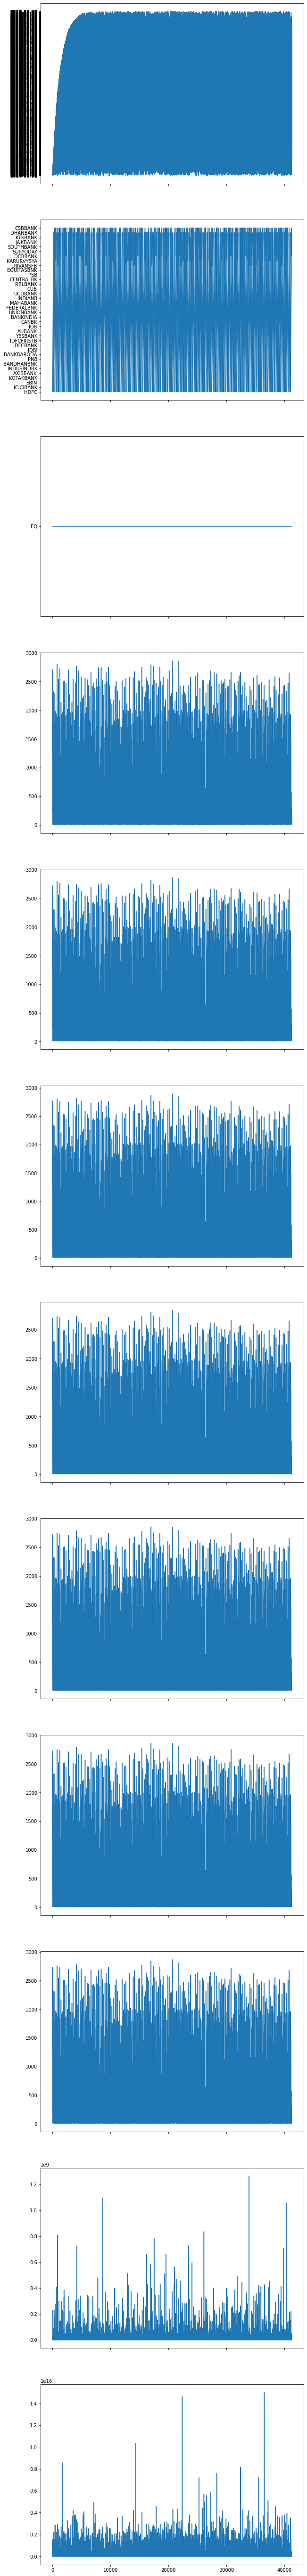

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(ncols=1, nrows=12,figsize=(10,100),sharey=False,sharex=True)
for i in range(12):
    ax[i].plot(df_pandas.iloc[:,i].values)
    

# HISTOGRAM

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

float64


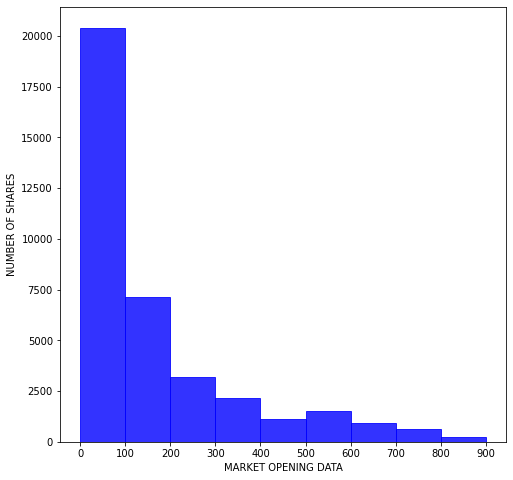

In [63]:
x = df.toPandas()['OPEN'].values.tolist()
bins = np.arange(0, 1000,100, dtype=float)

plt.figure(figsize=(8,8))
plt.hist(x,bins,alpha =0.8, histtype='bar', color='blue', ec='blue')
print(bins.dtype)

plt.xlabel("MARKET OPENING DATA")
plt.ylabel('NUMBER OF SHARES')
plt.xticks(bins)
plt.show()

float64


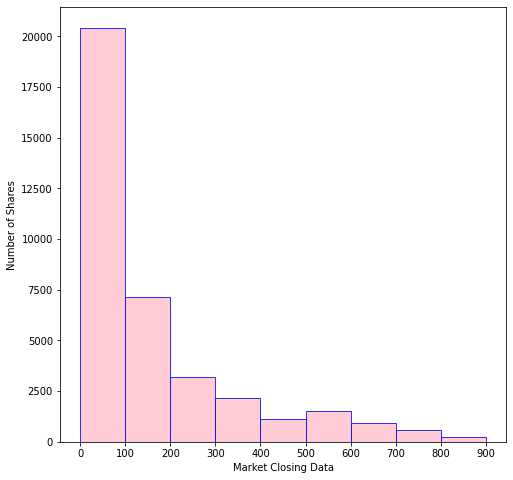

In [64]:
x = df.toPandas()['CLOSE'].values.tolist()
bins = np.arange(0, 1000,100, dtype=float)

plt.figure(figsize=(8,8))
plt.hist(x,bins,alpha =0.8, histtype='bar', color='pink', ec='blue')
print(bins.dtype)

plt.xlabel("Market Closing Data")
plt.ylabel('Number of Shares')
plt.xticks(bins)
plt.show()

float64


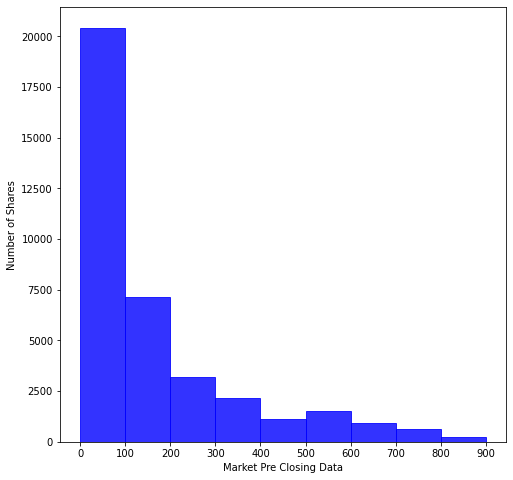

In [65]:
x = df.toPandas()['PREV CLOSE'].values.tolist()
bins = np.arange(0, 1000,100, dtype=float)

plt.figure(figsize=(8,8))
plt.hist(x,bins,alpha =0.8, histtype='bar', color='blue', ec='blue')
print(bins.dtype)

plt.xlabel("Market Pre Closing Data")
plt.ylabel('Number of Shares')
plt.xticks(bins)
plt.show()

float64


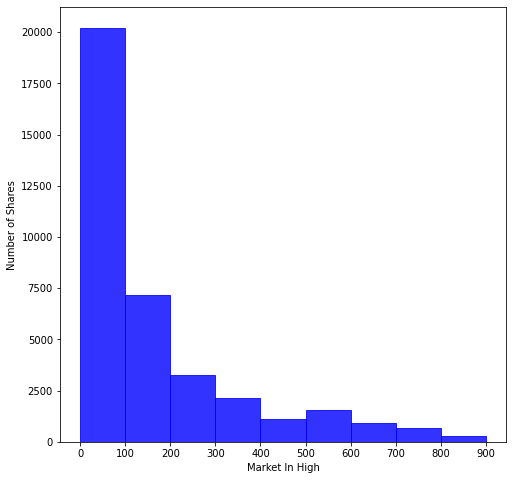

In [66]:
x = df.toPandas()['HIGH'].values.tolist()
bins = np.arange(0, 1000,100, dtype=float)

plt.figure(figsize=(8,8))
plt.hist(x,bins,alpha =0.8, histtype='bar', color='blue', ec='blue')
print(bins.dtype)

plt.xlabel("Market In High")
plt.ylabel('Number of Shares')
plt.xticks(bins)
plt.show()

float64


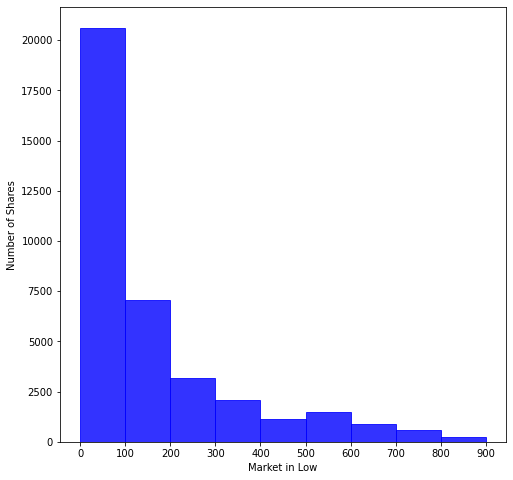

In [67]:
x = df.toPandas()['LOW'].values.tolist()
bins = np.arange(0, 1000,100, dtype=float)

plt.figure(figsize=(8,8))
plt.hist(x,bins,alpha =0.8, histtype='bar', color='blue', ec='blue')
print(bins.dtype)

plt.xlabel("Market in Low")
plt.ylabel('Number of Shares')
plt.xticks(bins)
plt.show()

float64


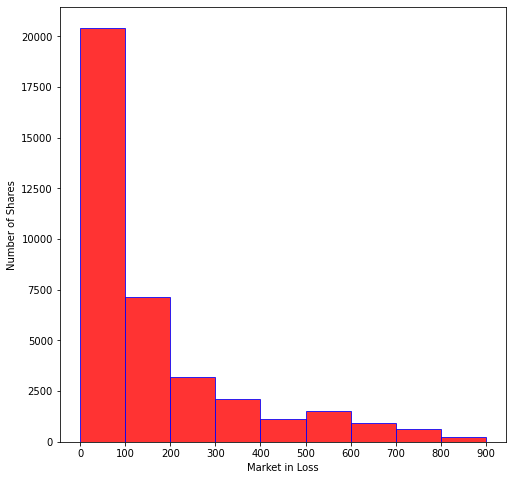

In [68]:
x = df.toPandas()['LAST'].values.tolist()
bins = np.arange(0, 1000,100, dtype=float)

plt.figure(figsize=(8,8))
plt.hist(x,bins,alpha =0.8, histtype='bar', color='red', ec='blue')
print(bins.dtype)

plt.xlabel("Market in Loss")
plt.ylabel('Number of Shares')
plt.xticks(bins)
plt.show()

float64


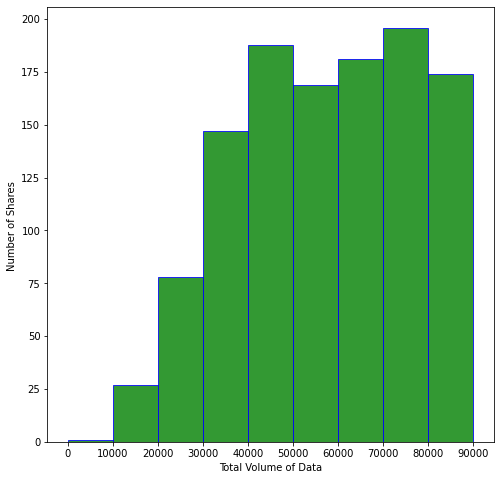

In [69]:
x = df.toPandas()['VOLUME'].values.tolist()
bins = np.arange(0, 100000,10000, dtype=float)

plt.figure(figsize=(8,8))
plt.hist(x,bins,alpha =0.8, histtype='bar', color='green', ec='blue')
print(bins.dtype)

plt.xlabel("Total Volume of Data")
plt.ylabel('Number of Shares ')
plt.xticks(bins)
plt.show()

float64


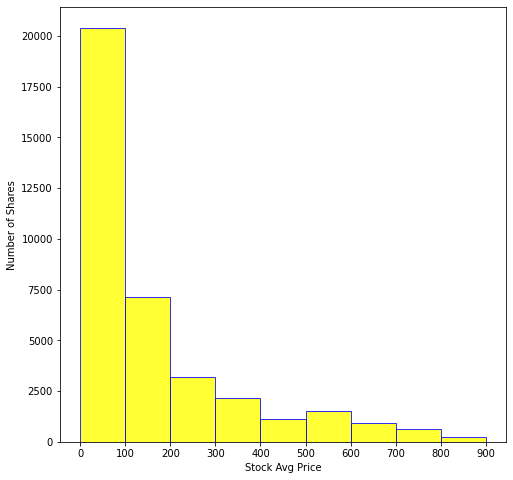

In [70]:
x = df.toPandas()['VWAP'].values.tolist()
bins = np.arange(0, 1000,100, dtype=float)

plt.figure(figsize=(8,8))
plt.hist(x,bins,alpha =0.8, histtype='bar', color='yellow', ec='blue')
print(bins.dtype)

plt.xlabel("Stock Avg Price")
plt.ylabel('Number of Shares')
plt.xticks(bins)
plt.show()

float64


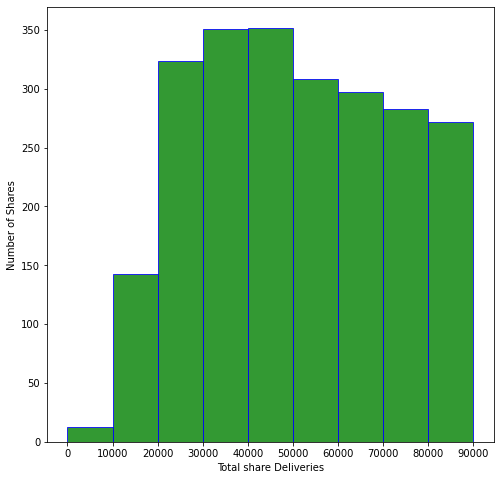

In [71]:
x = df.toPandas()['DELIVERABLE VOLUME'].values.tolist()
bins = np.arange(0, 100000,10000, dtype=float)

plt.figure(figsize=(8,8))
plt.hist(x,bins,alpha =0.8, histtype='bar', color='green', ec='blue')
print(bins.dtype)

plt.xlabel("Total share Deliveries")
plt.ylabel('Number of Shares')
plt.xticks(bins)
plt.show()

float64


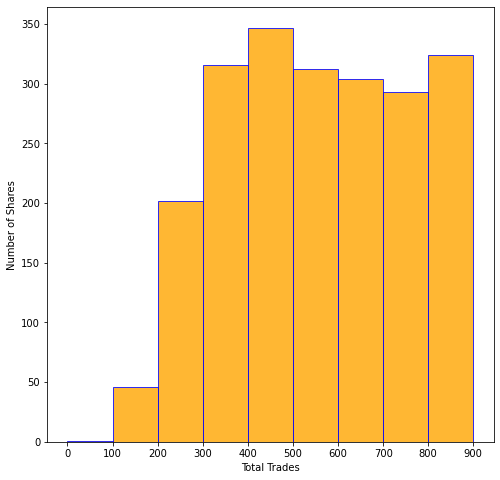

In [82]:
x = df.toPandas()['TRADES'].values.tolist()
bins = np.arange(0, 1000,100, dtype=float)

plt.figure(figsize=(8,8))
plt.hist(x,bins,alpha =0.8, histtype='bar', color='orange', ec='blue')
print(bins.dtype)

plt.xlabel("Total Trades")
plt.ylabel('Number of Shares')
plt.xticks(bins)
plt.show()

float64


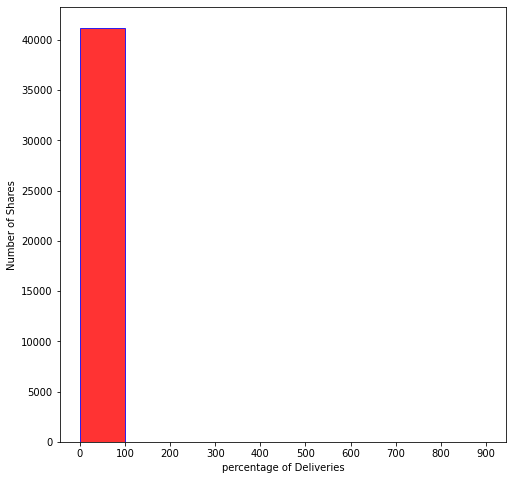

In [73]:
x = df.toPandas()['%DELIVERBLE'].values.tolist()
bins = np.arange(0, 1000,100, dtype=float)

plt.figure(figsize=(8,8))
plt.hist(x,bins,alpha =0.8, histtype='bar', color='red', ec='blue')
print(bins.dtype)

plt.xlabel("percentage of Deliveries")
plt.ylabel('Number of Shares')
plt.xticks(bins)
plt.show()

# BOX PLOT

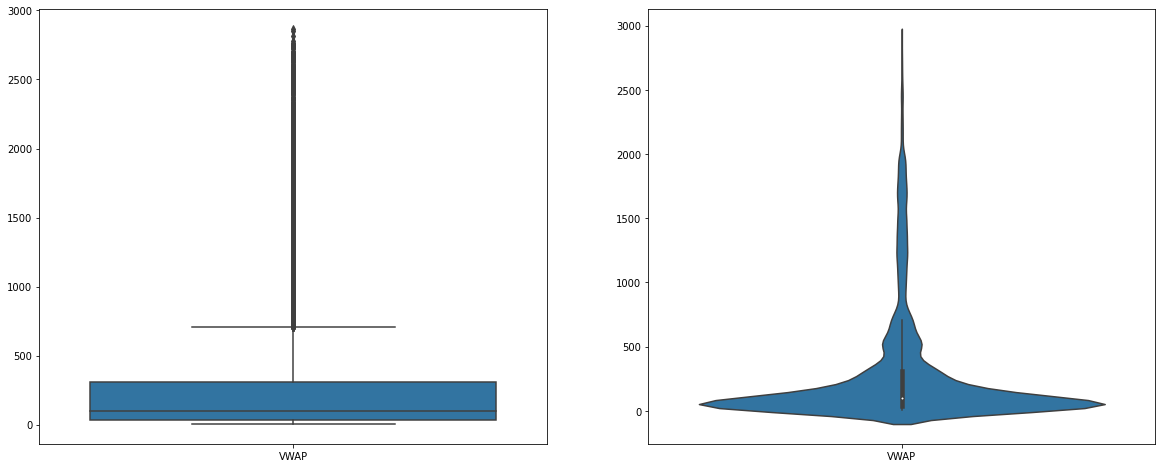

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df.select('VWAP').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

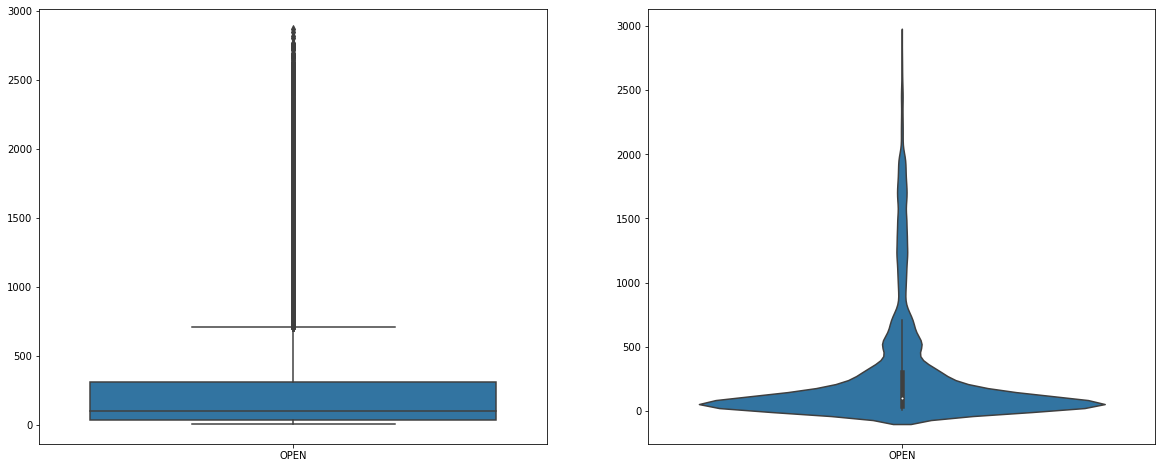

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df.select('OPEN').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

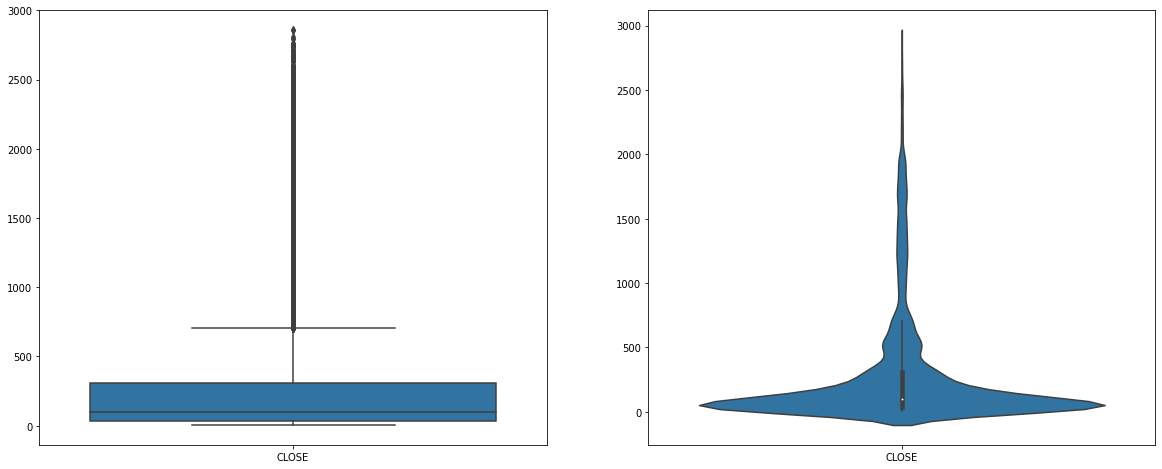

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df.select('CLOSE').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

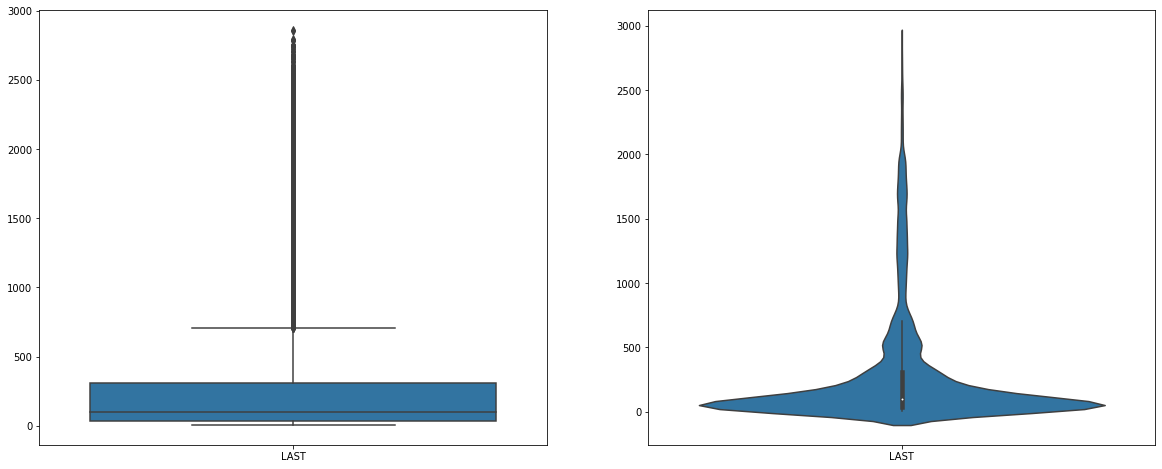

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df.select('LAST').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

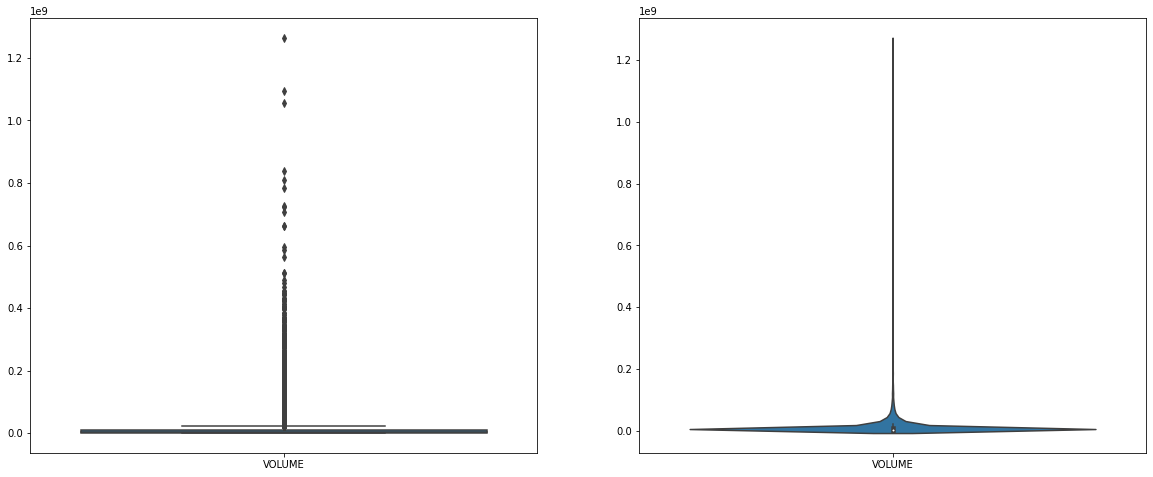

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df.select('VOLUME').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

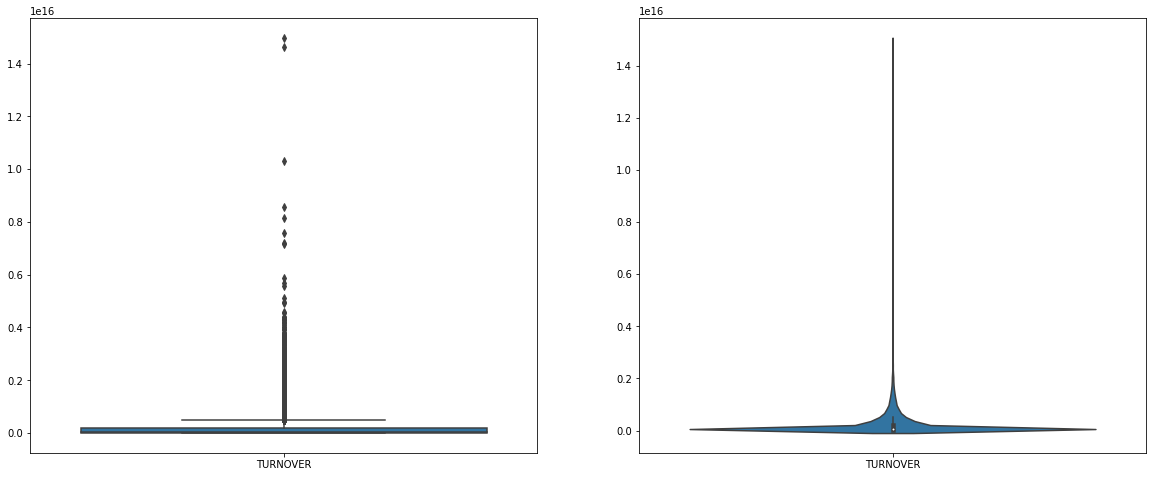

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df.select('TURNOVER').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

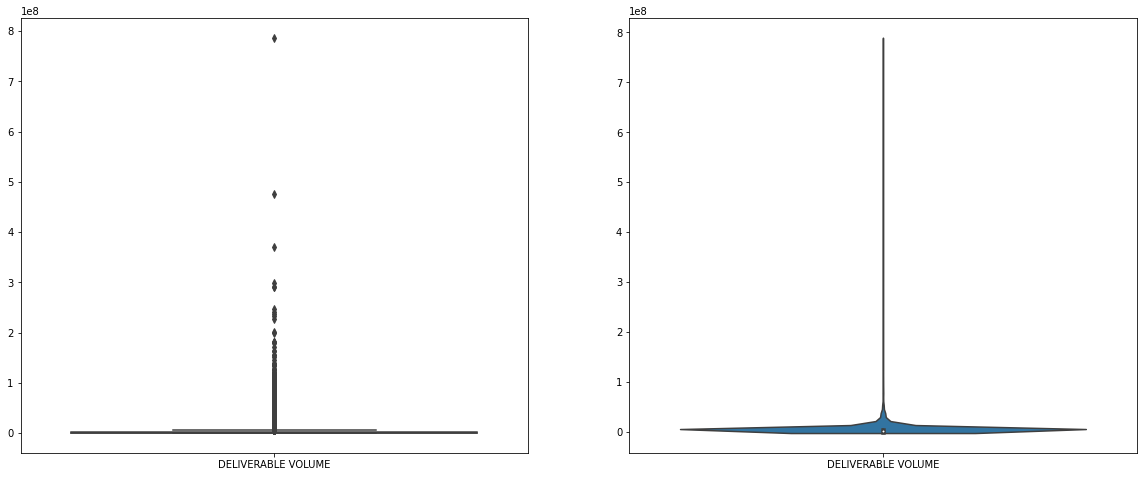

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df.select('DELIVERABLE VOLUME').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

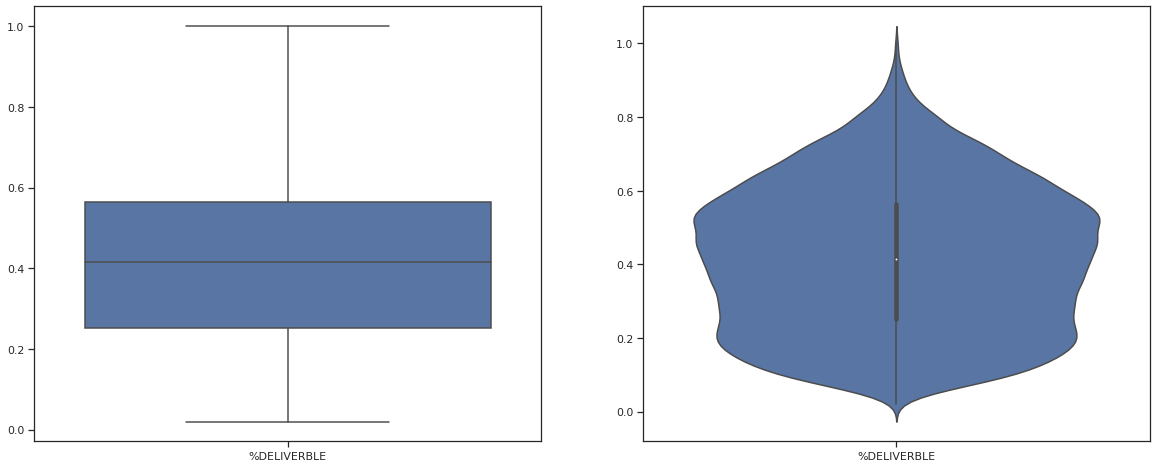

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df.select('%DELIVERBLE').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

# scatter plot

In [86]:
import pandas as pd

Text(0.5, 1.0, 'Scatter Plot')

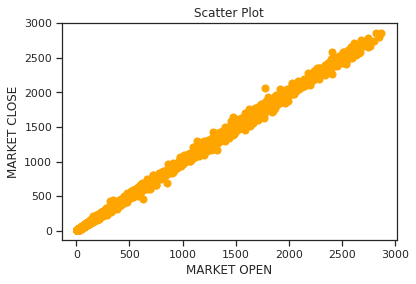

In [154]:
x1 = df.toPandas()['OPEN'].values.tolist()
y1 = df.toPandas()['CLOSE'].values.tolist()
plt.scatter(x1, y1, color='orange', s=50)
plt.xlabel('MARKET OPEN')
plt.ylabel('MARKET CLOSE')
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Scatter Plot')

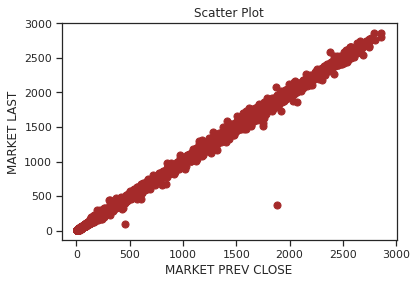

In [159]:
x1 = df.toPandas()['PREV CLOSE'].values.tolist()
y1 = df.toPandas()['LAST'].values.tolist()
plt.scatter(x1, y1, color='brown', s=50)
plt.xlabel('MARKET PREV CLOSE')
plt.ylabel('MARKET LAST')
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Scatter Plot')

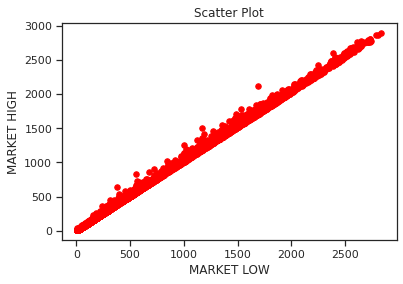

In [158]:
x1 = df.toPandas()['LOW'].values.tolist()
y1 = df.toPandas()['HIGH'].values.tolist()
plt.scatter(x1, y1, color='red', s=30)
plt.xlabel('MARKET LOW')
plt.ylabel('MARKET HIGH')
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Scatter Plot')

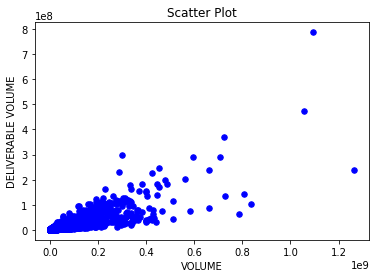

In [103]:
x1 = df.toPandas()['VOLUME'].values.tolist()
y1 = df.toPandas()['DELIVERABLE VOLUME'].values.tolist()
plt.scatter(x1, y1, color='blue', s=30)
plt.xlabel('VOLUME')
plt.ylabel('DELIVERABLE VOLUME')
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Scatter Plot')

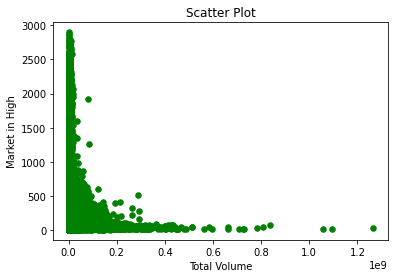

In [108]:
x1 = df.toPandas()['VOLUME'].values.tolist()
y1 = df.toPandas()['HIGH'].values.tolist()
plt.scatter(x1, y1, color='green', s=30)
plt.xlabel('Total Volume')
plt.ylabel('Market in High')
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Scatter Plot')

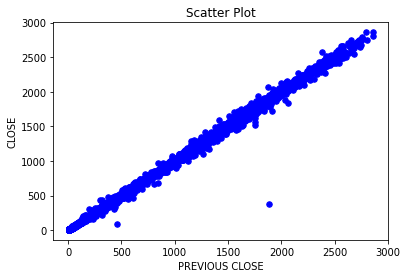

In [106]:
x1 = df.toPandas()['PREV CLOSE'].values.tolist()
y1 = df.toPandas()['CLOSE'].values.tolist()
plt.scatter(x1, y1, color='blue', s=30)
plt.xlabel('PREVIOUS CLOSE')
plt.ylabel('CLOSE')
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Scatter Plot')

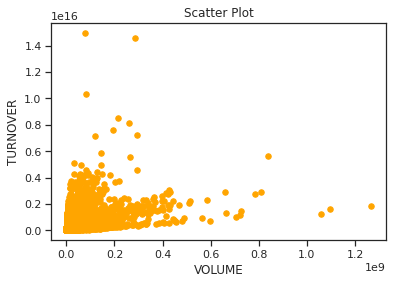

In [156]:
x1 = df.toPandas()['VOLUME'].values.tolist()
y1 = df.toPandas()['TURNOVER'].values.tolist()
plt.scatter(x1, y1, color='orange', s=30)
plt.xlabel('VOLUME')
plt.ylabel('TURNOVER')
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Scatter Plot')

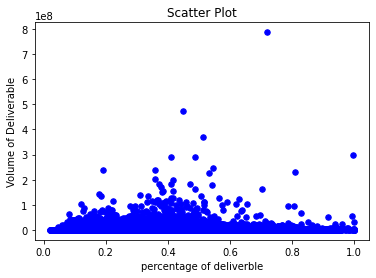

In [116]:
x1 = df.toPandas()['%DELIVERBLE'].values.tolist()
y1 = df.toPandas()['DELIVERABLE VOLUME'].values.tolist()
plt.scatter(x1, y1, color='blue', s=30)
plt.xlabel('percentage of deliverble')
plt.ylabel('Volume of Deliverable')
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Scatter Plot')

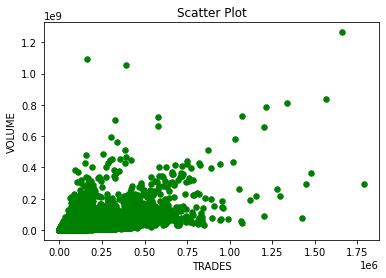

In [118]:
x1 = df.toPandas()['TRADES'].values.tolist()
y1 = df.toPandas()['VOLUME'].values.tolist()
plt.scatter(x1, y1, color='green', s=30)
plt.xlabel('TRADES')
plt.ylabel('VOLUME')
plt.title('Scatter Plot')

# pair plot

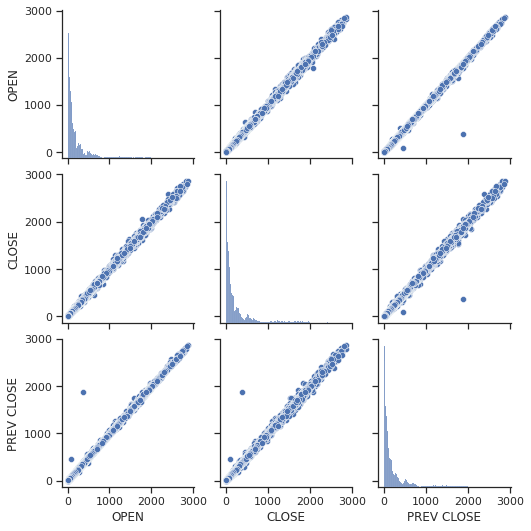

In [145]:
df_scatter_plot =df.select('OPEN','CLOSE','PREV CLOSE')

import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df_scatter_plot.toPandas())
plt.show()

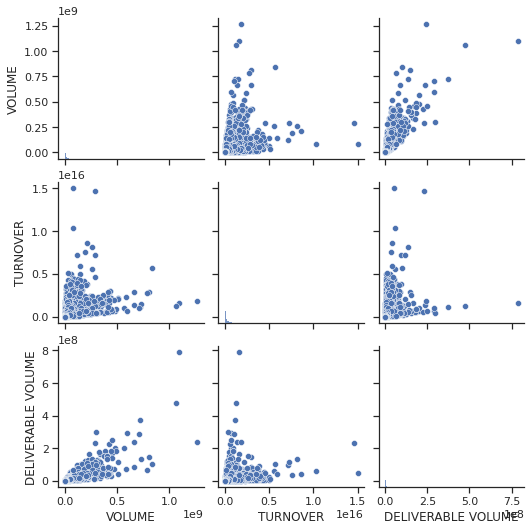

In [147]:
df_scatter_plot =df.select('VOLUME','TURNOVER','DELIVERABLE VOLUME')

import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df_scatter_plot.toPandas())
plt.show()

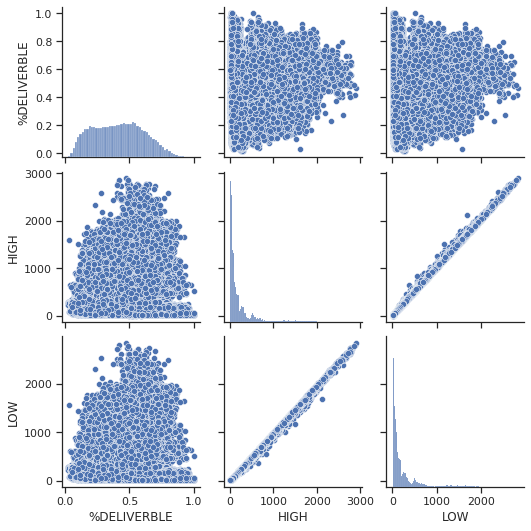

In [148]:
df_scatter_plot =df.select('%DELIVERBLE','HIGH','LOW')

import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df_scatter_plot.toPandas())
plt.show()

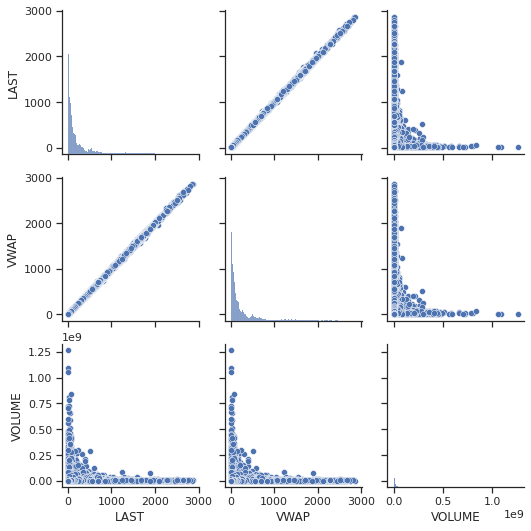

In [149]:
df_scatter_plot =df.select('LAST','VWAP','VOLUME')

import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df_scatter_plot.toPandas())
plt.show()

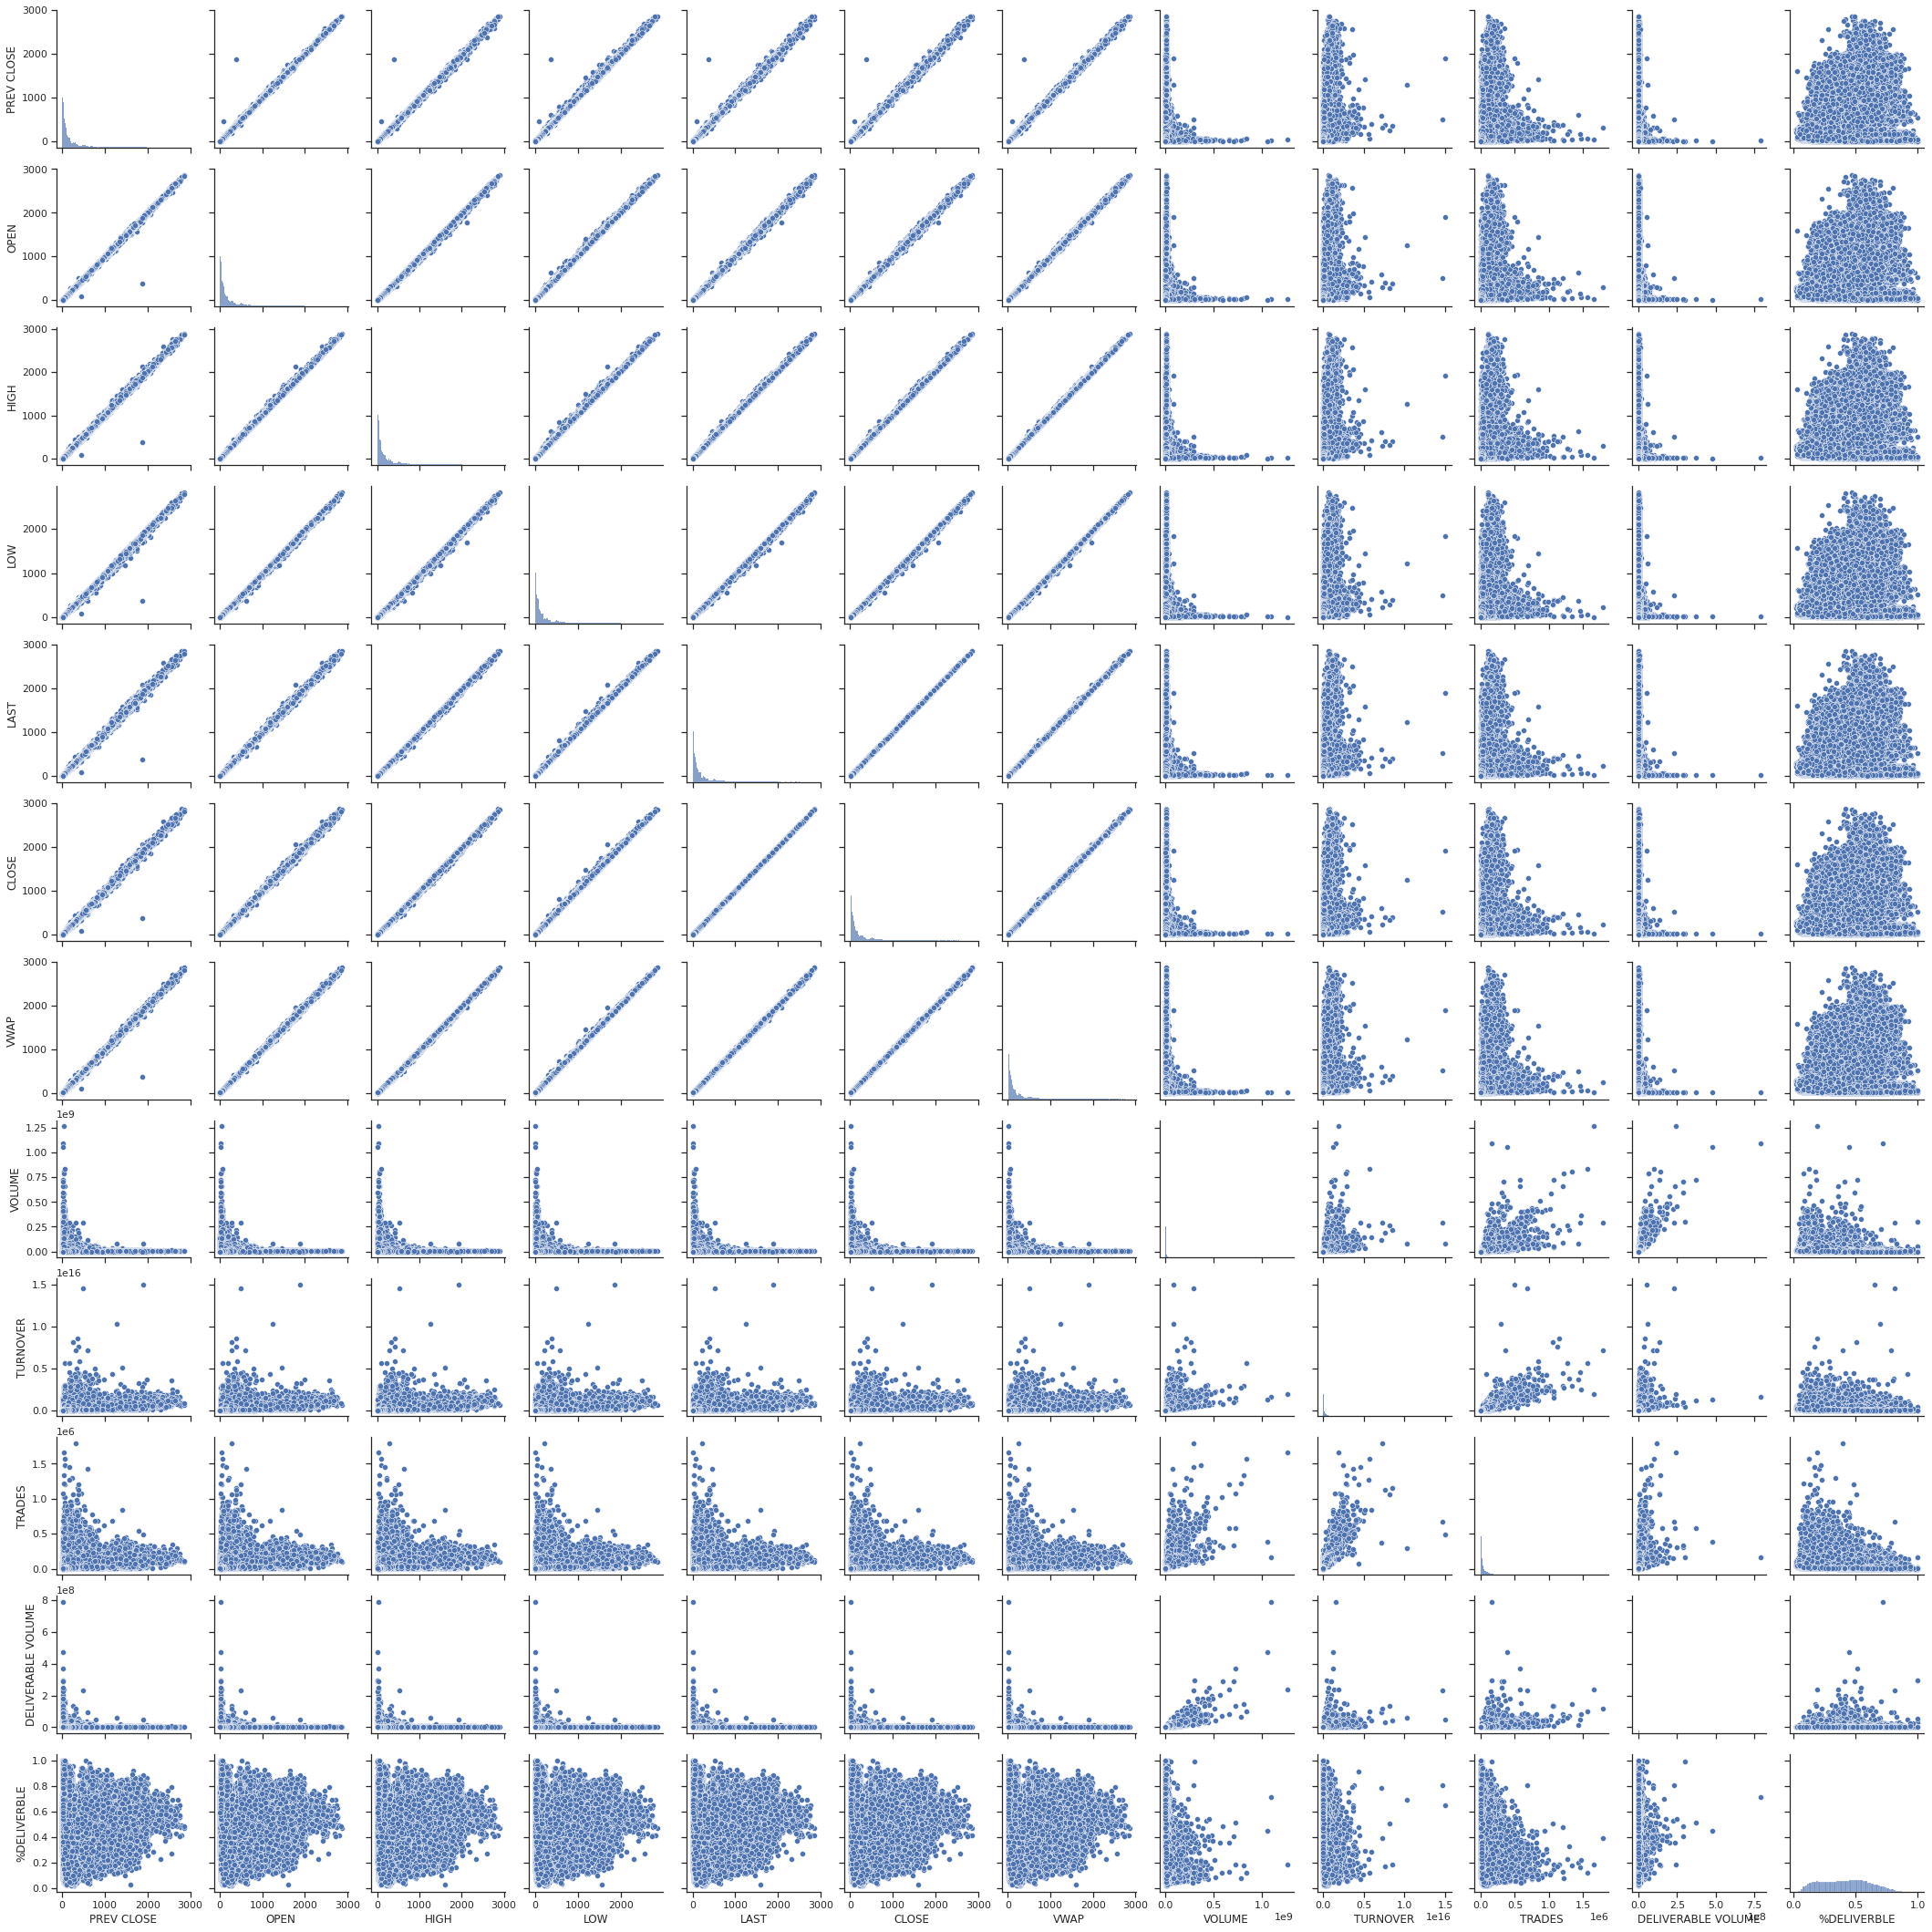

In [123]:
df_scatter_plot =df.select(
 'PREV CLOSE',
 'OPEN',
 'HIGH',
 'LOW',
 'LAST',
 'CLOSE',
 'VWAP',
 'VOLUME',
 'TURNOVER',
 'TRADES',
 'DELIVERABLE VOLUME',
 '%DELIVERBLE')

import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df_scatter_plot.toPandas())
plt.show()

# MACHINE LEARNING

In [124]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [125]:
coef_var =['PREV CLOSE','OPEN','HIGH','LOW','LAST','CLOSE','VOLUME','TURNOVER','TRADES','DELIVERABLE VOLUME','%DELIVERBLE']
assembler = VectorAssembler(inputCols=coef_var,
                           outputCol ='features')

In [126]:
output = assembler.transform(df)

In [127]:
final_df=output.select('features','VWAP')

In [128]:
train_data, test_data = final_df.randomSplit([0.7,0.3])

In [129]:
train_data.describe().show()

+-------+------------------+
|summary|              VWAP|
+-------+------------------+
|  count|             28865|
|   mean| 294.0291675038975|
| stddev|453.27546490382133|
|    min|              4.91|
|    max|           2847.59|
+-------+------------------+



In [130]:
test_data.describe().show()

+-------+------------------+
|summary|              VWAP|
+-------+------------------+
|  count|             12366|
|   mean|287.79938298560575|
| stddev| 451.1926101435522|
|    min|              4.94|
|    max|           2867.92|
+-------+------------------+



In [131]:
print(f"Train set length: {train_data.count()} records")
print(f"Test set length:{test_data.count()} records")

Train set length: 28865 records
Test set length:12366 records


# LINEAR REGRESSION MODEL

In [132]:
from pyspark.ml.regression import LinearRegression

In [133]:
lm = LinearRegression(labelCol='VWAP')

In [134]:
model = lm.fit(train_data)

In [135]:
#To show neat and clear manner i used pandas .
import pandas as pd

In [136]:
pd.DataFrame({"Coefficients":model.coefficients}, index = coef_var)

,Coefficients
PREV CLOSE,-2.685918e-03
OPEN,-3.321131e-02
HIGH,4.307286e-01
LOW,3.630813e-01
LAST,-1.745913e-01
CLOSE,4.159906e-01
VOLUME,2.837304e-09
TURNOVER,2.818528e-16
TRADES,-2.545833e-06
DELIVERABLE VOLUME,-3.658491e-09


In [137]:
res = model.evaluate(test_data)

In [138]:
res.residuals.show()

+--------------------+
|           residuals|
+--------------------+
| 0.18260570445801072|
|-0.10249519829850762|
|-0.11309319392346495|
| 0.04064536705332422|
|-0.03019420931072...|
| 0.08724814866620889|
| -0.3083173848227503|
|0.029032744919792464|
| -0.0990945516691113|
| 0.04065944904909813|
|-0.12942216314000632|
|-0.00917101758116...|
|-0.02878547675851...|
| 0.05975486148752651|
| 0.06359274247891733|
| 0.11331237039550501|
|  0.4603662218294602|
| -0.1827297787703941|
|-0.04068749176156672|
| 0.08060224381352299|
+--------------------+
only showing top 20 rows



In [139]:
unlabeled_data = test_data.select('features')

In [140]:
predictions = model.transform(unlabeled_data)

In [141]:
predictions.show()

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|[9.3,9.35,9.45,9....| 9.167394295541989|
|[13.45,13.55,13.6...|13.312495198298508|
|[14.65,14.65,15.1...|14.973093193923464|
|[14.95,15.2,15.2,...|14.709354632946676|
|[16.2,16.3,16.35,...|16.080194209310722|
|[16.6,16.9,17.1,1...| 16.75275185133379|
|[17.1,17.3,17.9,1...| 17.48831738482275|
|[17.15,17.5,17.65...| 17.09096725508021|
|[19.8,19.9,19.95,...| 19.58909455166911|
|[19.95,19.9,20.2,...|19.689340550950902|
|[23.85,23.9,24.25...|24.019422163140007|
|[23.9,23.9,24.25,...|23.649171017581168|
|[29.15,29.15,29.6...|29.288785476758513|
|[30.25,30.2,30.55...|30.290245138512475|
|[32.95,32.75,33.4...| 32.50640725752108|
|[36.45,36.9,37.8,...|37.106687629604494|
|[42.05,42.25,45.3...| 43.98963377817054|
|[47.15,46.7,48.8,...| 47.91272977877039|
|[51.95,52.35,52.8...|52.340687491761564|
|[52.05,51.9,53.4,...|52.719397756186474|
+--------------------+------------

In [142]:
print("MEAN ABOSULTE ERROR: ", res.meanAbsoluteError)
print("MEAN SQUARE ERROR: ", res.meanSquaredError)
print("ROOT MEAN SQUARE ERROR: ", res.rootMeanSquaredError)
print("R2: ", res.r2)
print("Adj R2: ", res.r2adj)

MEAN ABOSULTE ERROR:  0.6582458837188474
MEAN SQUARE ERROR:  2.673658497937767
ROOT MEAN SQUARE ERROR:  1.6351325628027127
R2:  0.9999868653924705
Adj R2:  0.9999868536974177
